In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import pickle
import seaborn as sns

In [3]:
pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')

In [4]:
with open("..\data\df_iq.pkl",'rb') as file:
    df_iq = pickle.load(file)

with open("..\data\df_sj.pkl", 'rb') as file:
    df_sj = pickle.load(file)

In [5]:
df_sj.drop('city',axis=1,inplace=True)
df_sj.reset_index(inplace=True)

df_iq.drop('city',axis=1,inplace=True)
df_iq.reset_index(inplace=True)

In [6]:
# Both locations are close enough to the equator that they share solstices and equinox: www.timeanddate.com
#seasonal groupings
winter = np.append([51,52],np.arange(1,12))
spring = np.arange(12,25)
summer = np.arange(25,39)
fall = np.arange(39,51)

In [7]:
#Create column 'season' that represents the quarter of the seasonal cycle that this week of year belongs to
def make_seasons(row):
    if row.weekofyear in(winter):
        return 'winter'
    elif row.weekofyear in(spring):
        return 'spring'
    elif row.weekofyear in(summer):
        return 'summer'
    elif row.weekofyear in(fall):
        return 'fall'

df_sj['season'] = df_sj.apply(make_seasons, axis=1)
df_iq['season'] = df_iq.apply(make_seasons, axis=1)

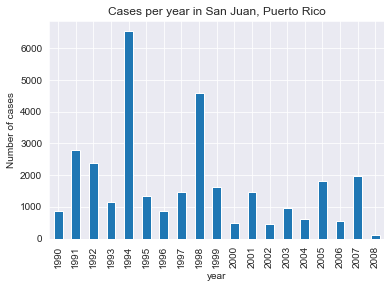

In [8]:
#SJ cases
df_sj.groupby('year')['total_cases'].sum().plot(kind='bar')
plt.ylabel('Number of cases')
plt.title('Cases per year in San Juan, Puerto Rico');

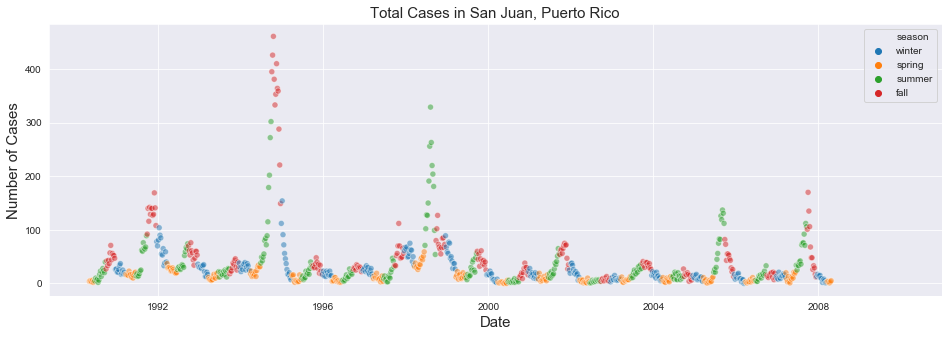

In [9]:
#broken down by season
plt.figure(figsize=(16,5))
sns.scatterplot(x='week_start_date', y='total_cases', data=df_sj, hue='season',
                hue_order=['winter','spring','summer','fall'], alpha=0.5)
plt.title('Total Cases in San Juan, Puerto Rico',size=15)
plt.xlabel('Date',size=15)
plt.ylabel('Number of Cases',size=15);

We see big spikes in cases in 1994-1995 and late 1998. A look at the timeline of San Juan, Puerto Rico during these times reveals that the island was suffering from a major drought in 1994-1995, causing people to be creative with their water resources as well as the closing of many landfills due to water pollution weakened the island's health. September 1998 brought Hurricane George to the island which caused displaced many people and introduced a lot of standing water, bringing a hotzone of mosquito activity.

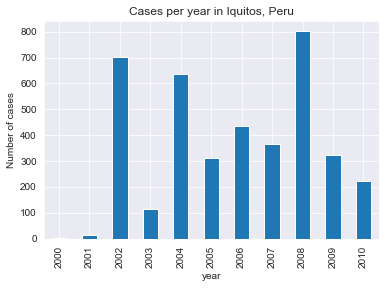

In [10]:
df_iq.groupby('year')['total_cases'].sum().plot(kind='bar')
plt.title('Cases per year in Iquitos, Peru')
plt.ylabel('Number of cases');

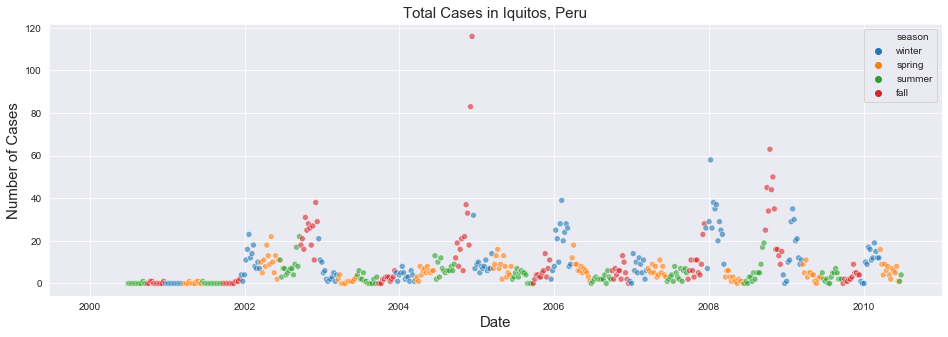

In [11]:
#broken down by season
plt.figure(figsize=(16,5))
sns.scatterplot(x='week_start_date', y='total_cases', data=df_iq, hue='season',
                hue_order=['winter','spring','summer','fall'], alpha=0.6)
plt.title('Total Cases in Iquitos, Peru',size=15)
plt.xlabel('Date',size=15)
plt.ylabel('Number of Cases',size=15);

### Looking at the data in frequentist terms.

Both cities are near the equator, with San Juan, Puerto Rico being approximately 1300 miles North and Iquitos, Peru being approximately 300 miles South of the equator. I wouldn't expect that the seasons are vastly different between the two cities and according to the site I gathered my season dates, www.timeanddate.com, despite them being on the opposite side of the equator.

In [12]:
#we'll look at the data in the same time period for both cities for clearer graphs and comparisons
sub_sj = df_sj[df_sj.week_start_date.isin(df_iq.week_start_date)].copy().reset_index(drop=True)
sub_iq = df_iq[df_iq.week_start_date.isin(sub_sj.week_start_date)].copy()

We'll look at tempurature and precipitation as these can play a big part on the ecology of mosquitoes.

### Tempurature

In [13]:
#both cities have a some missing values
sub_sj.station_avg_temp_c.fillna(method='ffill', inplace=True)
sub_iq.station_avg_temp_c.fillna(method='ffill', inplace=True)

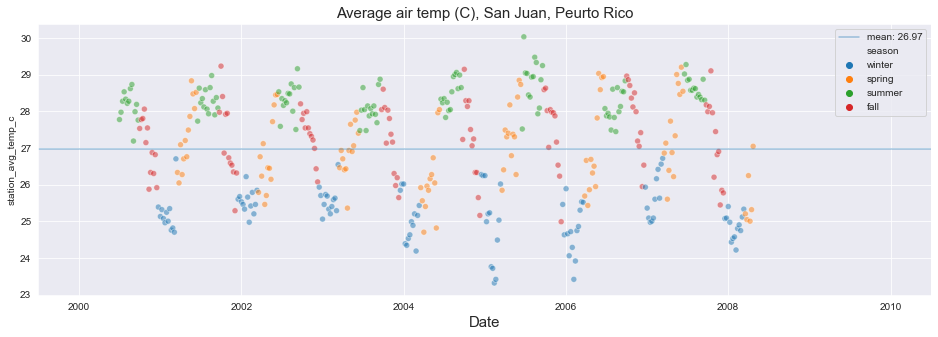

In [14]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='week_start_date', y='station_avg_temp_c', data=sub_sj, hue='season',
                hue_order=['winter','spring','summer','fall'], alpha=0.5)
plt.axhline(sub_sj.station_avg_temp_c.mean(), alpha= 0.4, label= 'mean: %.2f'%(sub_sj.station_avg_temp_c.mean()))
plt.title('Average air temp (C), San Juan, Peurto Rico',size=15)
plt.xlabel('Date', size=15)
plt.legend();

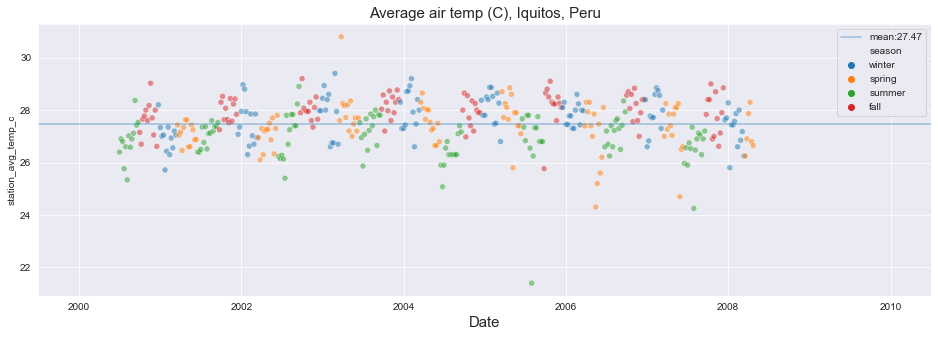

In [15]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='week_start_date', y='station_avg_temp_c', data=sub_iq, hue='season', 
                hue_order=['winter','spring','summer','fall'], alpha=0.5)
plt.axhline(sub_iq.station_avg_temp_c.mean(), alpha= 0.4, label= 'mean:%.2f'%(sub_iq.station_avg_temp_c.mean()))
plt.title('Average air temp (C), Iquitos, Peru',size=15)
plt.xlabel('Date', size=15)
plt.legend();

We see a more defined pattern in San Juan, Puerto Rico for average temperature than in Iquitos, Peru but our means are close. 

In [15]:
print("San Juan, Puerto Rico air temp mean: %.3f"%(sub_sj.station_avg_temp_c.mean()))
print("Iquitos, Peru mean air temp: %.3f" %(sub_iq.station_avg_temp_c.mean()))

San Juan, Puerto Rico air temp mean: 26.971
Iquitos, Peru mean air temp: 27.471


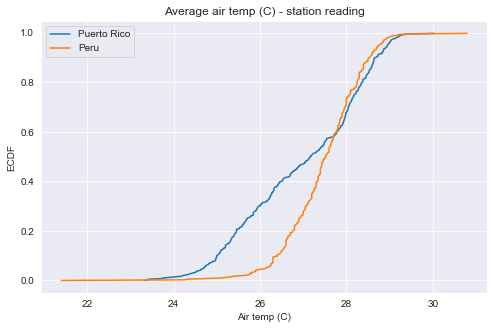

In [16]:
plt.figure(figsize=(8,5))
plt.plot(sorted(sub_sj.station_avg_temp_c), np.arange(len(sub_sj))/len(sub_sj), label="Puerto Rico")
plt.plot(sorted(sub_iq.station_avg_temp_c), np.arange(len(sub_iq))/len(sub_iq), label="Peru")
plt.xlabel('Air temp (C)')
plt.ylabel('ECDF')
plt.title('Average air temp (C) - station reading')
plt.legend();

It looks like the data for Peru is more normal than that of Puerto Rico.

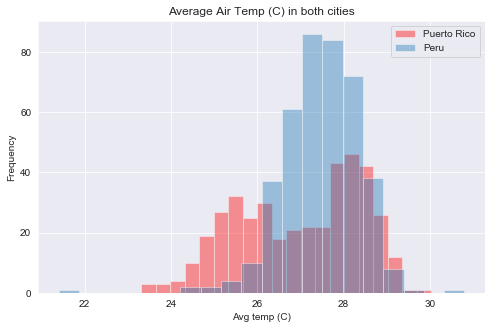

In [17]:
plt.figure(figsize=(8,5))
plt.hist(sub_sj.station_avg_temp_c, 20, alpha=0.4, color='r', label='Puerto Rico')
plt.hist(sub_iq.station_avg_temp_c, 20, alpha=0.4,label='Peru')
plt.xlabel('Avg temp (C)')
plt.ylabel('Frequency')
plt.title('Average Air Temp (C) in both cities')
plt.legend();

Indeed, we see a bimodal distribution in our data for Puerto Rico.

If we assume the reports are independant and the weeks records are not influenced by the previous weeks records, we can apply use the Centeral Limit Theorem to determine whether these sample data is representative of the whole population and if these differences are representative of the whole population.

For this, we can set our hypothesis as such:

**Null hypothesis:** These mean value for the average air temp is equal for San Juan and Iquitos.
**Alternative hypothesis:** These two means are in fact not equal.

In [18]:
"""
Function: draw_reps(data, function, size=1000)
    This function builds an array of size size, 
    calling the bootstrap function each time, 
    with each element being a bootstrap of data with a function 
    applied.
    
Inputs:
    data: column(s) to perform bootstrap on
    function: function to perform in bootstrap step(ie. np.mean())
    
Return:
    array of size size, containing the bootstraps of data with
    function function applied.
"""

def draw_reps(data,function,size=10000):
    reps_array = np.empty(size)
    
    for i in range(size):
        reps_array[i] = bootstrap(data,function)
        
    return reps_array


#sample with replacement
def bootstrap(data,func):
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

In [19]:
#draw bootstrap with replacement, get mean of bootstraps
np.random.seed(32)
N_reps=10000
bs_temp_sj = draw_reps(sub_sj.station_avg_temp_c, np.mean, N_reps)
bs_temp_iq = draw_reps(sub_iq.station_avg_temp_c, np.mean, N_reps)

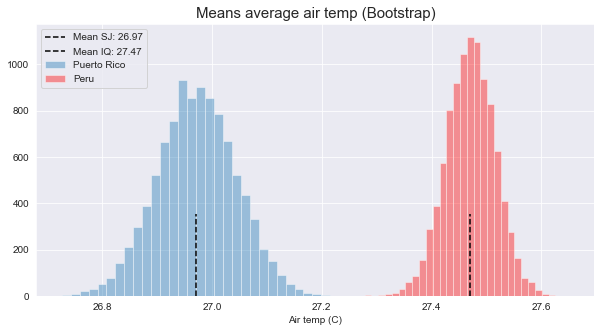

In [20]:
plt.figure(figsize=(10,5))
plt.hist(bs_temp_sj, bins=30, alpha= 0.4, label='Puerto Rico')
plt.hist(bs_temp_iq, 30,color= 'r', alpha= 0.4, label='Peru')
plt.title('Means average air temp (Bootstrap)', size=15)
plt.xlabel('Air temp (C)')
plt.axvline(bs_temp_sj.mean(), ymax= .3, color='k', ls='--', label='Mean SJ: %.2f'%bs_temp_sj.mean())
plt.axvline(bs_temp_iq.mean(), ymax= .3, color='k', ls='--', label='Mean IQ: %.2f'%bs_temp_iq.mean())
plt.legend();

It seems that the two cities indeed have distinct average air tempurature means. We'll apply a t-test to validate this and see how significant these differences are.

In [21]:
dof = (2*N_reps)-2 #degrees of freedom
var_sj = np.var(bs_temp_sj) 
var_iq = np.var(bs_temp_iq)
s_pooled = np.sqrt((var_iq + var_sj)/2)
t = (bs_temp_iq.mean() - bs_temp_sj.mean())/(s_pooled * np.sqrt(2/N_reps))
p = 1 - stats.t.cdf(t, df=dof)
print("t = ", t)
print("p = ", 2*p)

t =  595.6401308098642
p =  0.0


We can see that the means are very different from our t-score.

With such a low p-value, we can safely reject the null hypothesis that these two means are equal. 

### Precipitation

Aside from tempurature, I believe that precipitation is plays a big part in mosquito populations. We'll take a look at the different precipitation records see if these match our expectations.

In [22]:
# each city has a couple of missing values
sub_sj.station_precip_mm.fillna(method= 'ffill', inplace= True)
sub_iq.station_precip_mm.fillna(method= 'ffill', inplace= True)

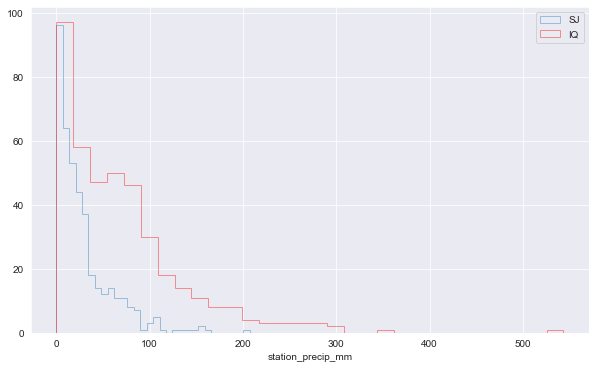

In [54]:
plt.figure(figsize=(10,6))
sns.distplot(sub_sj.station_precip_mm, bins= 30, kde= False, label='SJ', hist_kws={"histtype":"step"})
sns.distplot(sub_iq.station_precip_mm, bins= 30, kde= False, color='r', label= 'IQ', hist_kws={"histtype":"step"})
plt.legend()

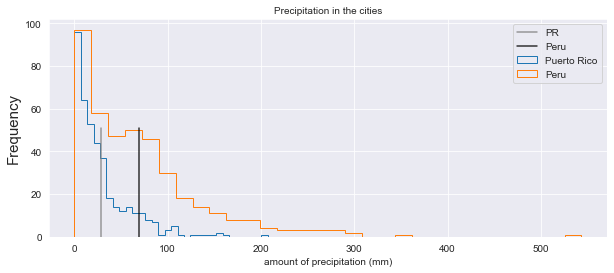

In [24]:
plt.figure(figsize= (10,4))
plt.hist(sub_sj.station_precip_mm, 30, histtype= 'step', label= 'Puerto Rico')
plt.hist(sub_iq.station_precip_mm, 30, histtype= 'step', label= 'Peru')
plt.axvline(np.mean(sub_sj.station_precip_mm), ymax= 0.5, label= 'PR', color='gray', alpha= 0.8)
plt.axvline(np.mean(sub_iq.station_precip_mm), ymax= 0.5, label= 'Peru', color='k', alpha= 0.8)
plt.legend() 
plt.xlabel('amount of precipitation (mm)', size=10)
plt.title('Precipitation in the cities', size=10)
plt.ylabel('Frequency', size=15);

In [25]:
print("SJ average precipitation: {:.3f}".format(sub_sj.station_precip_mm.mean()))
print("IQ average precipitation: {:.3f}".format(sub_iq.station_precip_mm.mean()))

SJ average precipitation: 29.096
IQ average precipitation: 69.150


With San Juan, Puerto Rico being a part of the Caribbean islands, I was expecting to see that San Juan had more rain due to being close to the ocean and the tradewinds that cross over to the Gulf.

We'll run a bootstrap test to see if the data for rainfall in this sample is representative of the population data.

* **Null Hypothesis**  The mean precipitation of San Juan, Puerto Rico is equal to that of the mean precipitation for Iquitos, Peru
* **Alternate Hypothesis** The average precipitation in San Juan is not that of the average precipitation in Iquitos.

Assuming the Null Hypothesis, **$H_0$** is true:

Though our distribution of data of precipitation readings is what appears exponential, utilizing the Central Limit Theorem, we can resample the data that we have to draw conclusions of what the mean value of the population would be if we had multiple samples to get a better representation. 

In [26]:
"""
shifted means array structure:
        array - mean(array) + combined_mean


shift_means(data,amount):
    shift the mean of data to amount
============
Inputs
============
        data: data to shift
        amount: value to shift mean of data to    
Return:
============
    shifted: shifted array
    
"""
def shift_means(data, amount):
    shifted = data - np.mean(data) + amount
    return shifted

In [27]:
obs_mean = np.mean(pd.concat([sub_sj.station_precip_mm, sub_iq.station_precip_mm]))
obs_mean_diff = np.mean(sub_sj.station_precip_mm) - np.mean(sub_iq.station_precip_mm)

print('observed std of total dataset: %.3f'%obs_mean)
print('observed difference of std: %.3f'%obs_mean_diff)

observed std of total dataset: 49.123
observed difference of std: -40.054


In [28]:
sj_shifted = shift_means(sub_sj.station_precip_mm, obs_mean)
iq_shifted = shift_means(sub_iq.station_precip_mm, obs_mean)

np.random.seed(32)
sj_shifted_bs = draw_reps(sj_shifted, np.mean,size= 10000)
iq_shifted_bs = draw_reps(iq_shifted, np.mean, size= 10000)

In [29]:
t_test, pval = stats.ttest_ind(iq_shifted_bs, sj_shifted_bs)
print('T-statistic of difference: {:.3f}'.format(t_test))
print('P value of 2 tailed: {:.3f}'.format(pval))

T-statistic of difference: -0.612
P value of 2 tailed: 0.541


Such a small t-score suggests that the 2 permuated groups are similar. The p value being as high as it is indicates that the null hypothesis of the two groups having equal mean is statistically significant, thus we fail to reject $H_0$. Meaning my assumption that the average precipitation in San Juan is closer to being the same on averge with that of Iquitos than our sample indicates seems to hold.

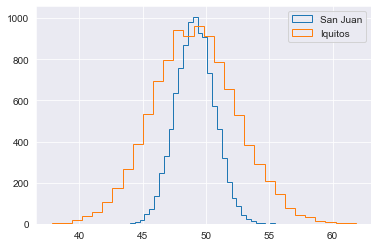

In [30]:
plt.hist(sj_shifted_bs, 30, histtype='step', label= 'San Juan')
plt.hist(iq_shifted_bs, 30, histtype='step', label= 'Iquitos')
plt.legend();